In [49]:
#directly used kaggle data through kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [50]:
#!chmod 600 ~/.kaggle/kaggle.json


In [51]:
#the dataset's API [click 3dots->copy API-> paste in colab ]
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
#convert zip into csv
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [53]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D

In [54]:
import tensorflow as tf
from tensorflow import keras

train_ds = keras.utils.image_dataset_from_directory( # Changed 'Keras' to 'keras'
    directory='/content/train',
    labels='inferred',
    label_mode='int', #int becoz it asign 0 to cat and 1 to dog
    batch_size=32,
    image_size=(256,256)
)

test_validation = keras.utils.image_dataset_from_directory( # Changed 'Keras' to 'keras'
    directory='/content/test',
    labels='inferred',
    label_mode='int', #int becoz it asign 0 to cat and 1 to dog
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


**keras.utils.image_dataset_from_directory(...):** This function helps load images from a specified directory and automatically labels them based on the folder names.

**directory='/content/train':**This specifies the path where your training images are stored. In this case, it’s looking in a folder called "train" within a directory named "content."

**labels='inferred':**This tells Keras to automatically figure out the labels for the images based on the subfolder names. For example, if you have a "cats" folder and a "dogs" folder, it will assign labels like 0 for cats and 1 for dogs.

**label_mode='int':** This means the labels will be integers. So, in this example, cats might be labeled as 0 and dogs as 1.

In [55]:
#normalization
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
test_validation = test_validation.map(process)

**image / 255.:**The pixel values of images typically range from 0 to 255. Dividing by 255 scales these values to a range between 0 and 1, which is more suitable for training neural networks.

**tf.cast(..., tf.float32):**This converts the data type of the image to a floating-point number. Neural networks often perform better with float values rather than integers.

**train_ds.map(process):** This applies the process function to each image-label pair in the training dataset, normalizing the images.

**test_validation.map(process):** Similarly, this applies the same normalization to the test (or validation) dataset.

#Summary
 the images in both the training and test/validation datasets by scaling the pixel values to a range of 0 to 1. This helps improve the performance and stability of the training process for machine learning models.

In [56]:
#create cnn model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) # Changed 'Kernel_size' to 'kernel_size'
model.add(MaxPooling2D((2,2),strides=2,padding='valid')) # Changed 'srides' to 'strides'

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu')) # Changed 'Kernel_size' to 'kernel_size'
model.add(MaxPooling2D((2,2),strides=2,padding='valid')) # Changed 'srides' to 'strides'

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu')) # Changed 'Kernel_size' to 'kernel_size' and 3128 to 128
model.add(MaxPooling2D((2,2),strides=2,padding='valid')) # Changed 'srides' to 'strides'

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
history=model.fit(train_ds,epochs=10,validation_data=test_validation)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 77ms/step - accuracy: 0.5855 - loss: 0.7082 - val_accuracy: 0.7260 - val_loss: 0.5535
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.7390 - loss: 0.5198 - val_accuracy: 0.7568 - val_loss: 0.5073
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7927 - loss: 0.4310 - val_accuracy: 0.7786 - val_loss: 0.5061
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 80ms/step - accuracy: 0.8549 - loss: 0.3207 - val_accuracy: 0.7806 - val_loss: 0.5935
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.9175 - loss: 0.1977 - val_accuracy: 0.7804 - val_loss: 0.8119
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9518 - loss: 0.1228 - val_accuracy: 0.7828 - val_loss: 1.0871
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9682 - loss: 0.0884 - val_accuracy: 0.7750 - val_loss: 1.3107
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 76ms/step - accuracy: 0.9770 - loss: 0.0701 - 

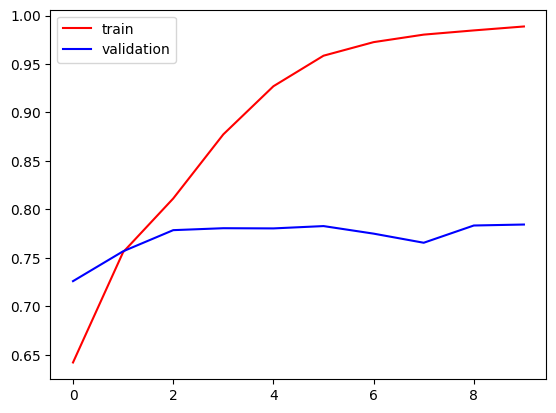

In [60]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

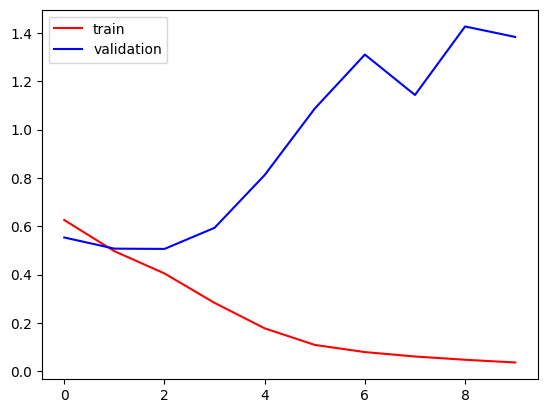

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# there is problem of underfitting becuase the gap betweeen two lines are more.


In [62]:
import cv2

In [63]:
test_image=cv2.imread('/content/dog.jpeg')

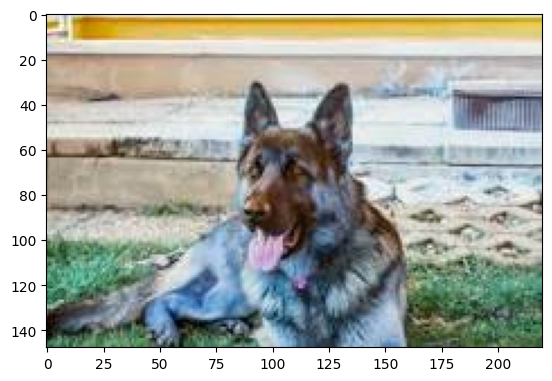

In [64]:
plt.imshow(test_image)

In [65]:
test_image.shape

(148, 220, 3)

In [66]:
#resize this image
test_image=cv2.resize(test_image, (256,256))
 #The first argument should be the image, and the second argument should be the desired size as a tuple.

In [67]:
#reshape
test_input=test_image.reshape(1,256,256,3)

In [68]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


array([[1.]], dtype=float32)

same thing apply on cat


In [69]:
import cv2

In [70]:
test_image=cv2.imread('/content/cat.jpeg')

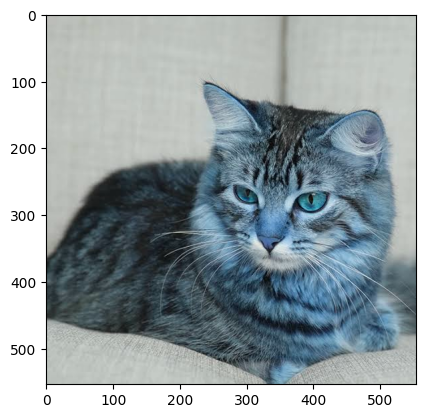

In [71]:
plt.imshow(test_image)

In [72]:
test_image.shape

(554, 554, 3)

In [73]:
#resize this image
test_image=cv2.resize(test_image, (256,256))

In [74]:
#reshape
test_input=test_image.reshape(1,256,256,3)

In [75]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.]], dtype=float32)